In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names
import pandas as pd



# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_0_crimes_100m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_0_crimes_100m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_0_crimes_100m'

In [2]:
value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# import numpy as np
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Crime Incidents Within 100m, Oct. 2022   
                                                 \emph{Independent Variable}                                                          
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_0_crimes_100m                                 8.278484e-231   
                                                 pre_treatment_change_in_group_0_crimes_100m                           3.025207e-26   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                    4.612871e-08   
                                                 job_density_2013                                                      1.328962e-41   
                                                 med_hhinc2016                                                         1.109418e-02   
                                                 poor_share2010                                                        5.730778e-01   
                                                 popdensity2010                                                        2.001413e-09   
Panel C: Case Initiation                         for_cause                                                             5.903330e-02   
                                                 no_cause                                                              3.898887e-03   
                                                 non_payment                                                           7.644527e-04   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                              4.386866e-01   
                                                 hasAttyP                                                              5.654924e-03   
                                                 isEntityD                                                             2.330143e-03   
                                                 isEntityP                                                             9.116441e-07   

                                                                                                                
                                                                                             Plaintiff Victory  
                                                 \emph{Independent Variable}                                    
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_0_crimes_100m             7.952306e-02  
                                                 pre_treatment_change_in_group_0_crimes_100m      8.694767e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                               7.782860e-01  
                                                 job_density_2013                                 5.178933e-01  
                                                 med_hhinc2016                                    1.224981e-01  
                                                 poor_share2010                                   5.297634e-01  
                                                 popdensity2010                                   6.607443e-03  
Panel C: Case Initiation                         for_cause                                        1.764482e-08  
                                                 no_cause                                         8.995981e-01  
                                                 non_payment                                      4.059912e-07  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                         2.094824e-05  
                                                 hasAttyP                                         6.226457e-04  
                                                 isEntityD                                        1.265289e-02  
         

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                    Cases Won by Plaintiff   
Panel A twenty_seventeen_group_0_crimes_100m                      5.251836   
        pre_treatment_change_in_group_0_crimes_100m              -0.459601   
Panel B frac_coll_plus2010                                        0.322882   
        job_density_2013                                      16069.137185   
        med_hhinc2016                                         48035.651626   
        popdensity2010                                        23086.043553   
Panel C no_cause                                                  0.047744   
        non_payment                                               0.781742   
Panel D hasAttyP                                                  0.879853   
        isEntityD                                                 0.014166   
        isEntityP                                                 0.808499   

                                                    Difference in Cases Won by Defendant  \
                                                                              Unweighted   
Panel A twenty_seventeen_group_0_crimes_100m                                    0.351771   
        pre_treatment_change_in_group_0_crimes_100m                             0.024500   
Panel B frac_coll_plus2010                                                      0.002115   
        job_density_2013                                                      926.908698   
        med_hhinc2016                                                        1312.556234   
        popdensity2010                                                       1225.145069   
Panel C no_cause                                                               -0.000926   
        non_payment                                                            -0.067707   
Panel D hasAttyP                                                               -0.035786   
        isEntityD                                                              -0.011791   
        isEntityP                                                              -0.064959   

                                                                   \
                                                         \emph{p}   
Panel A twenty_seventeen_group_0_crimes_100m         7.952306e-02   
        pre_treatment_change_in_group_0_crimes_100m  8.694767e-01   
Panel B frac_coll_plus2010                           7.782860e-01   
        job_density_2013                             5.178933e-01   
        med_hhinc2016                                1.224981e-01   
        popdensity2010                               6.607443e-03   
Panel C no_cause                                     8.995981e-01   
        non_payment                                  4.059912e-07   
Panel D hasAttyP                                     6.226457e-04   
        isEntityD                                    1.265289e-02   
        isEntityP                                    2.625077e-07   

                                                                            
                                                        Weighted  \emph{p}  
Panel A twenty_seventeen_group_0_crimes_100m           -0.115881  0.549903  
        pre_treatment_change_in_group_0_crimes_100m     0.013422  0.928938  
Panel B frac_coll_plus2010                             -0.008282  0.267715  
        job_density_2013                             -363.430192  0.800482  
        med_hhinc2016                               -1172.962394  0.142277  
        popdensity2010                               -528.451558  0.184880  
Panel C no_cause                                       -0.001298  0.860866  
        non_payment                                    -0.024376  0.047973  
Panel D hasAttyP                                       -0.025036  0.016767  
        isEntityD                                      -0.001069  0.815432  
        isEntityP                         

In [5]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
missing_variables = []

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, missing_variables, value_vars_crime, month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:19<00:00, 110.11it/s]


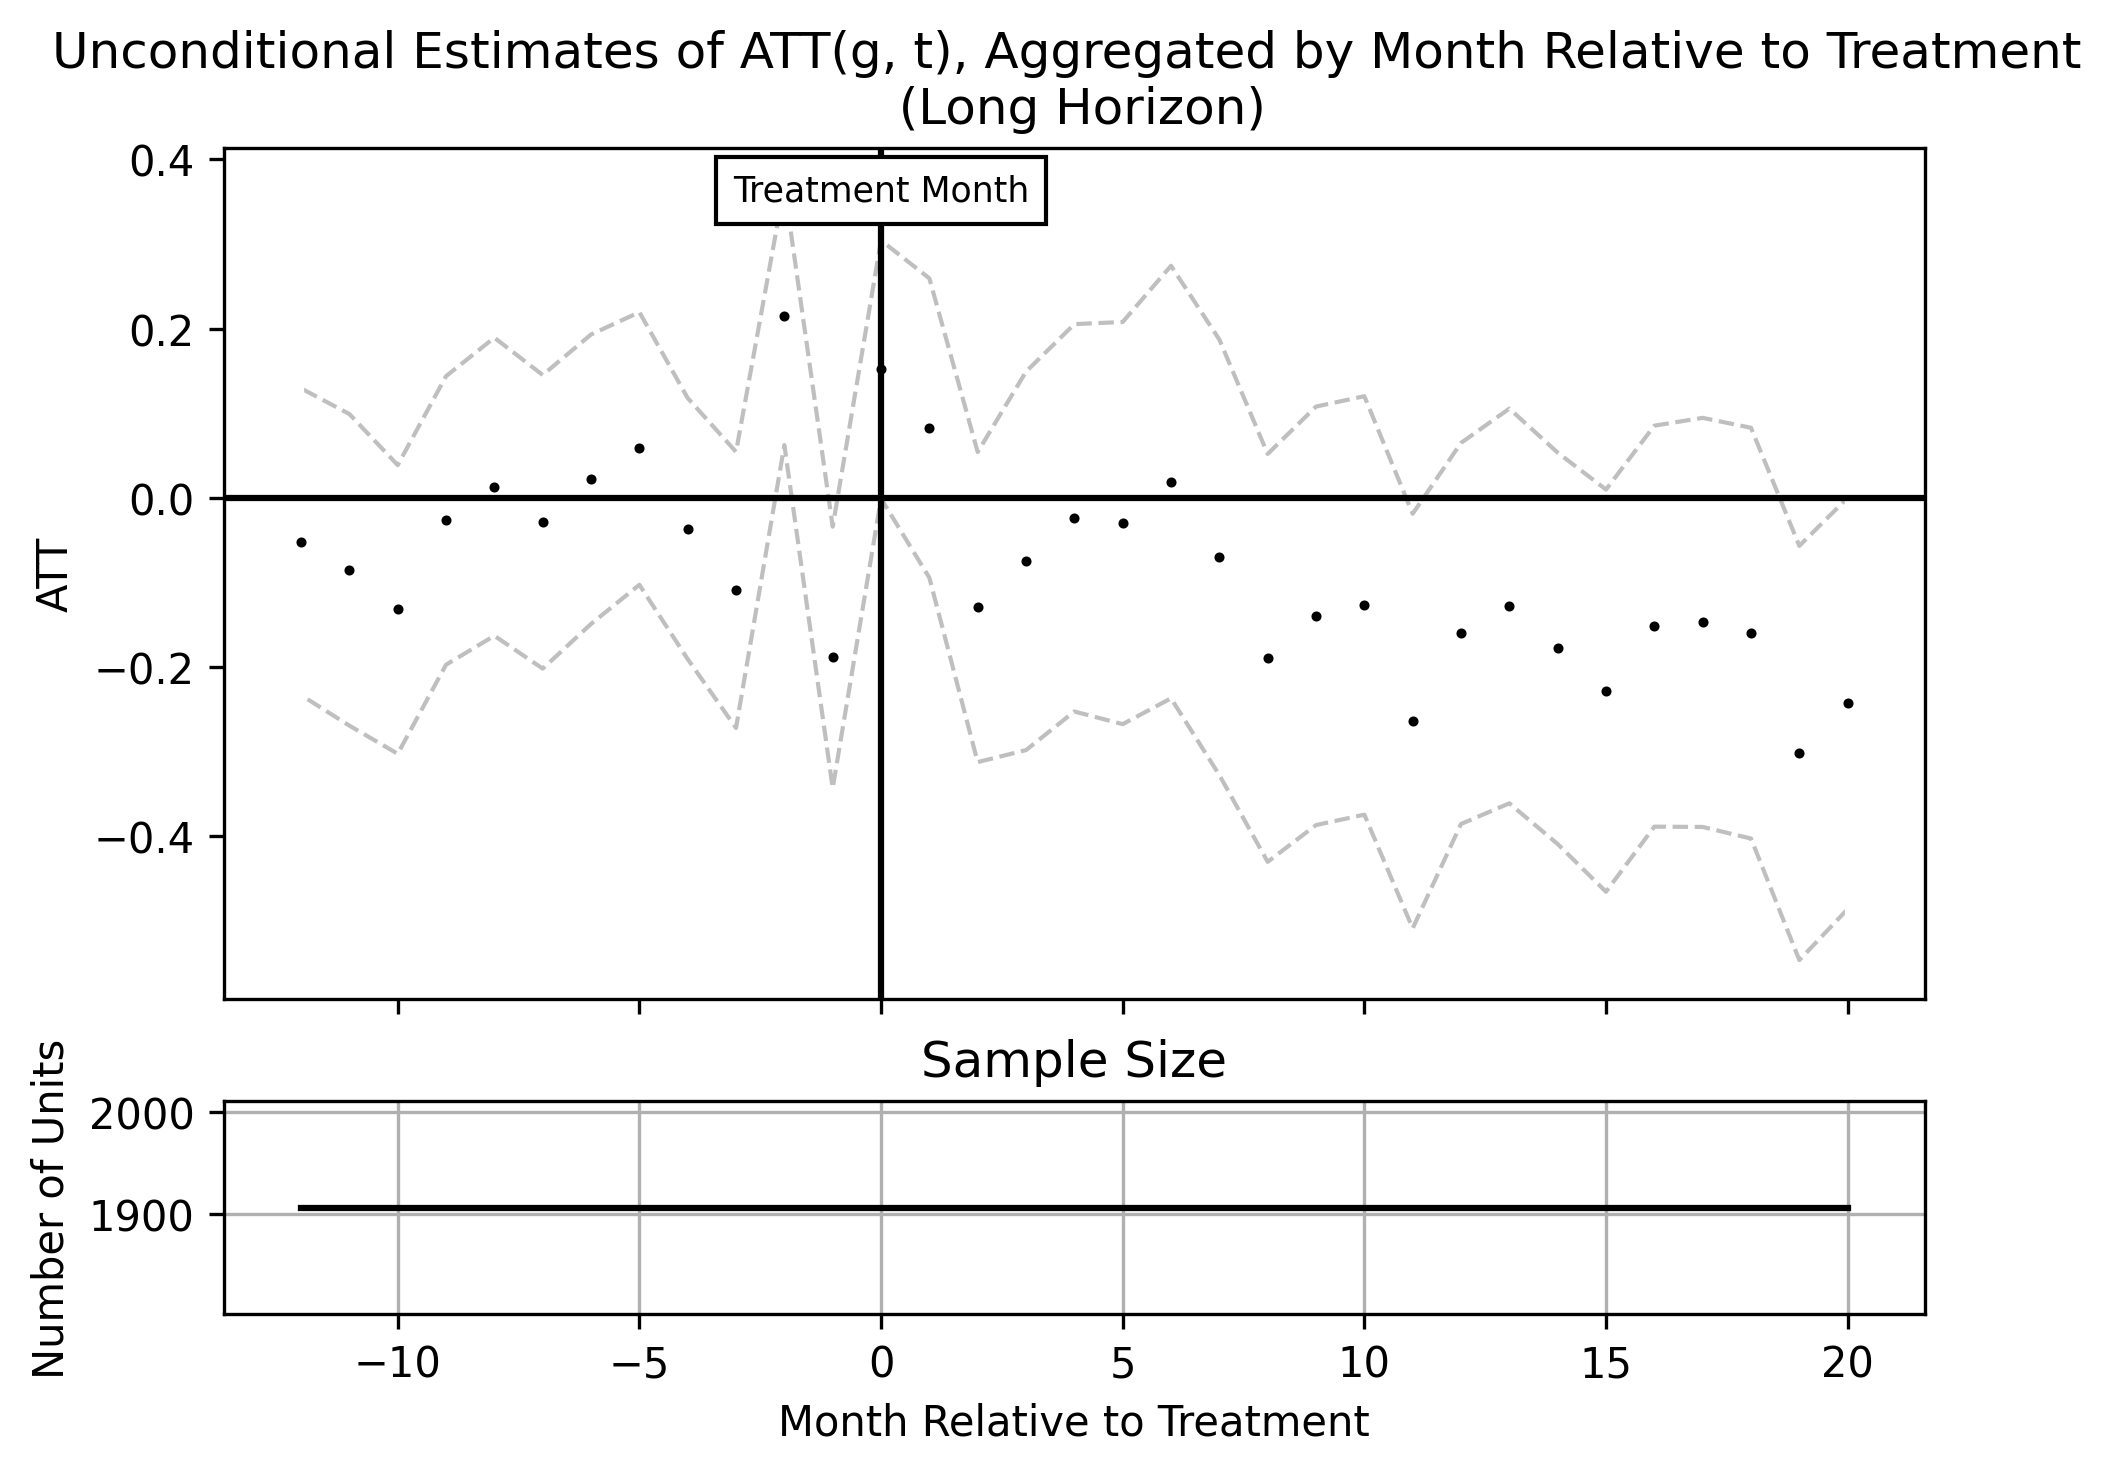

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

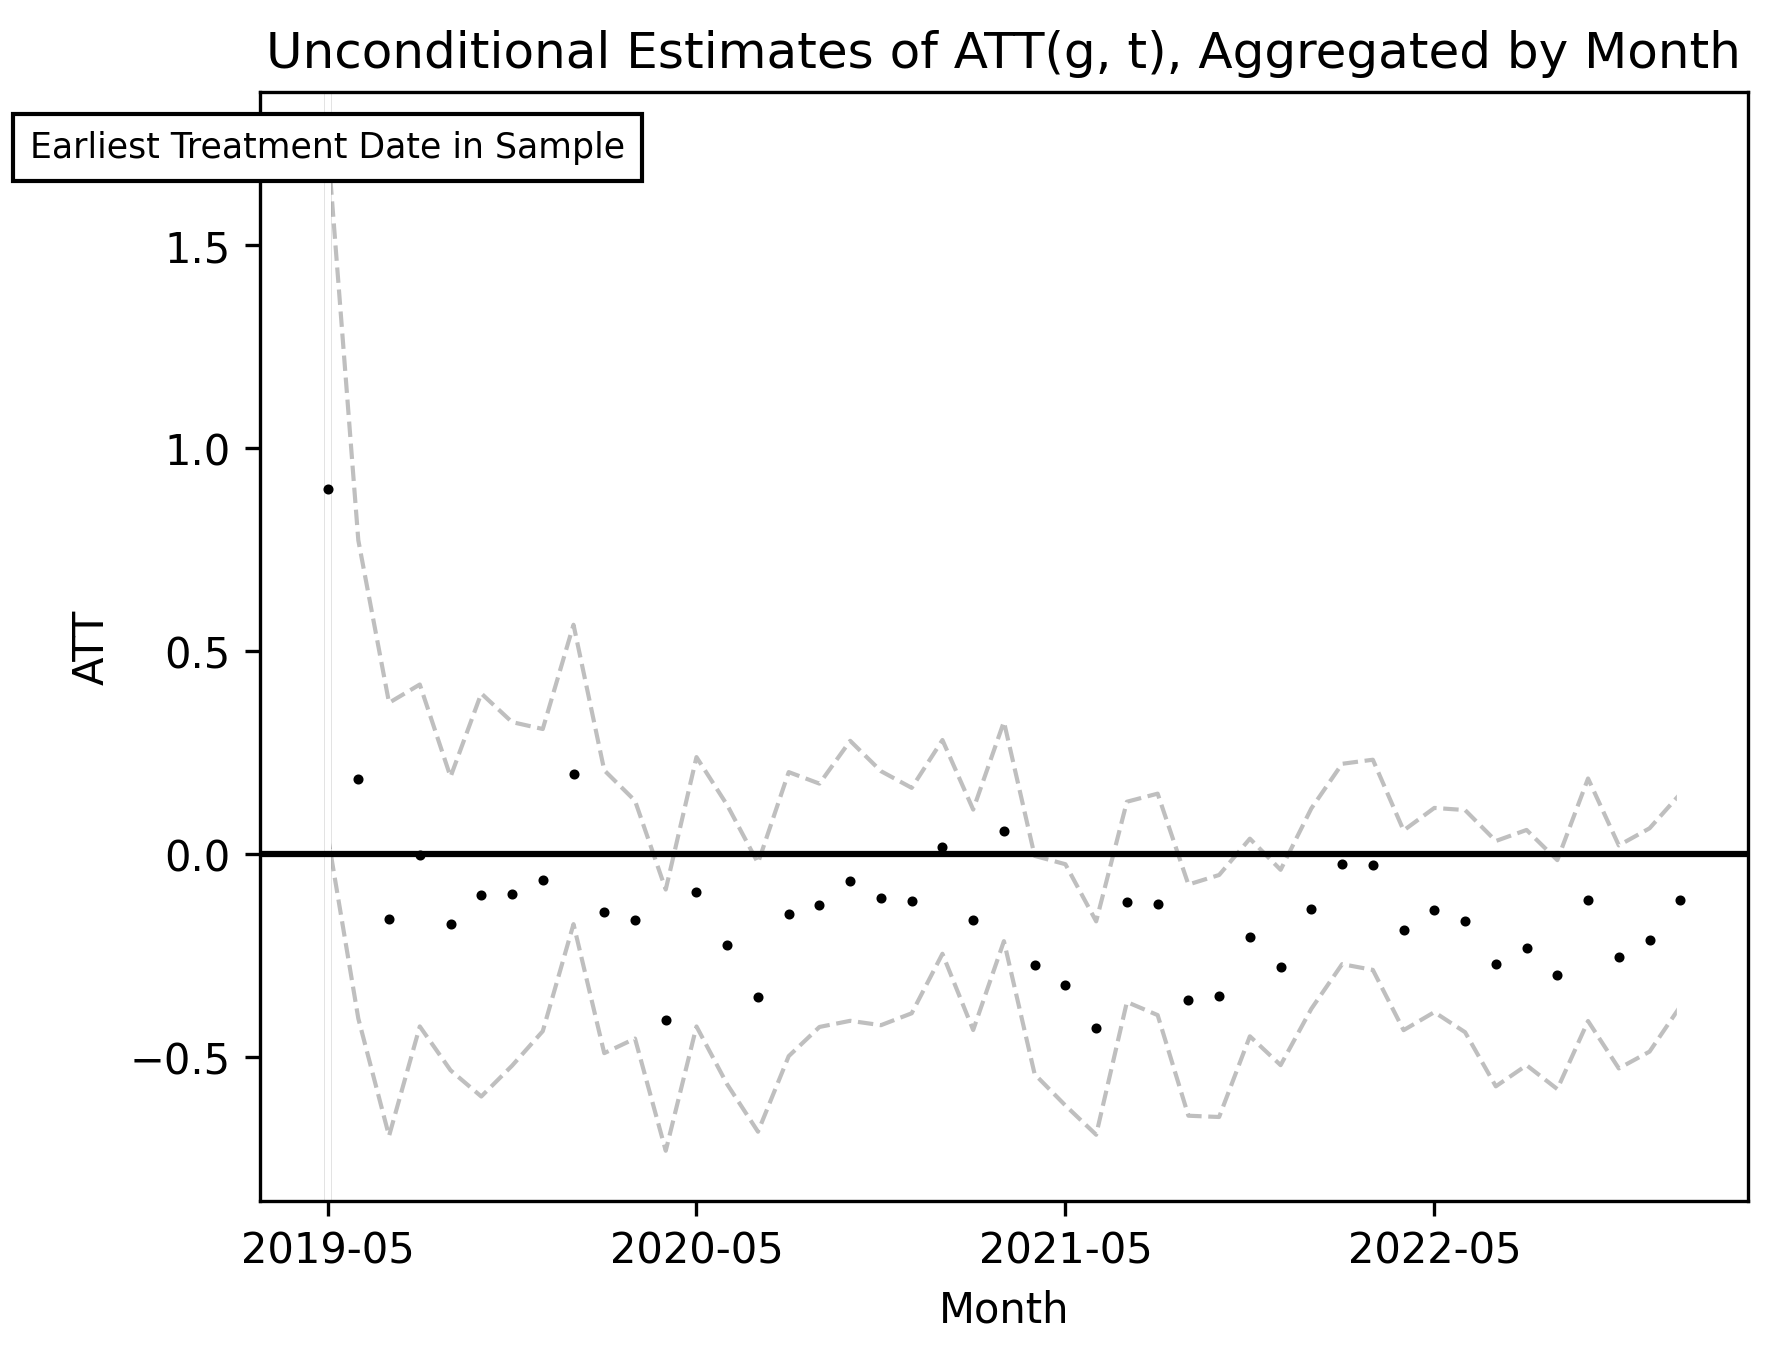

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [ ]:
# Run DiD conditional on covariates.
pre_treatment_covariates.remove('job_density_2013')
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1, progress_bar=True)

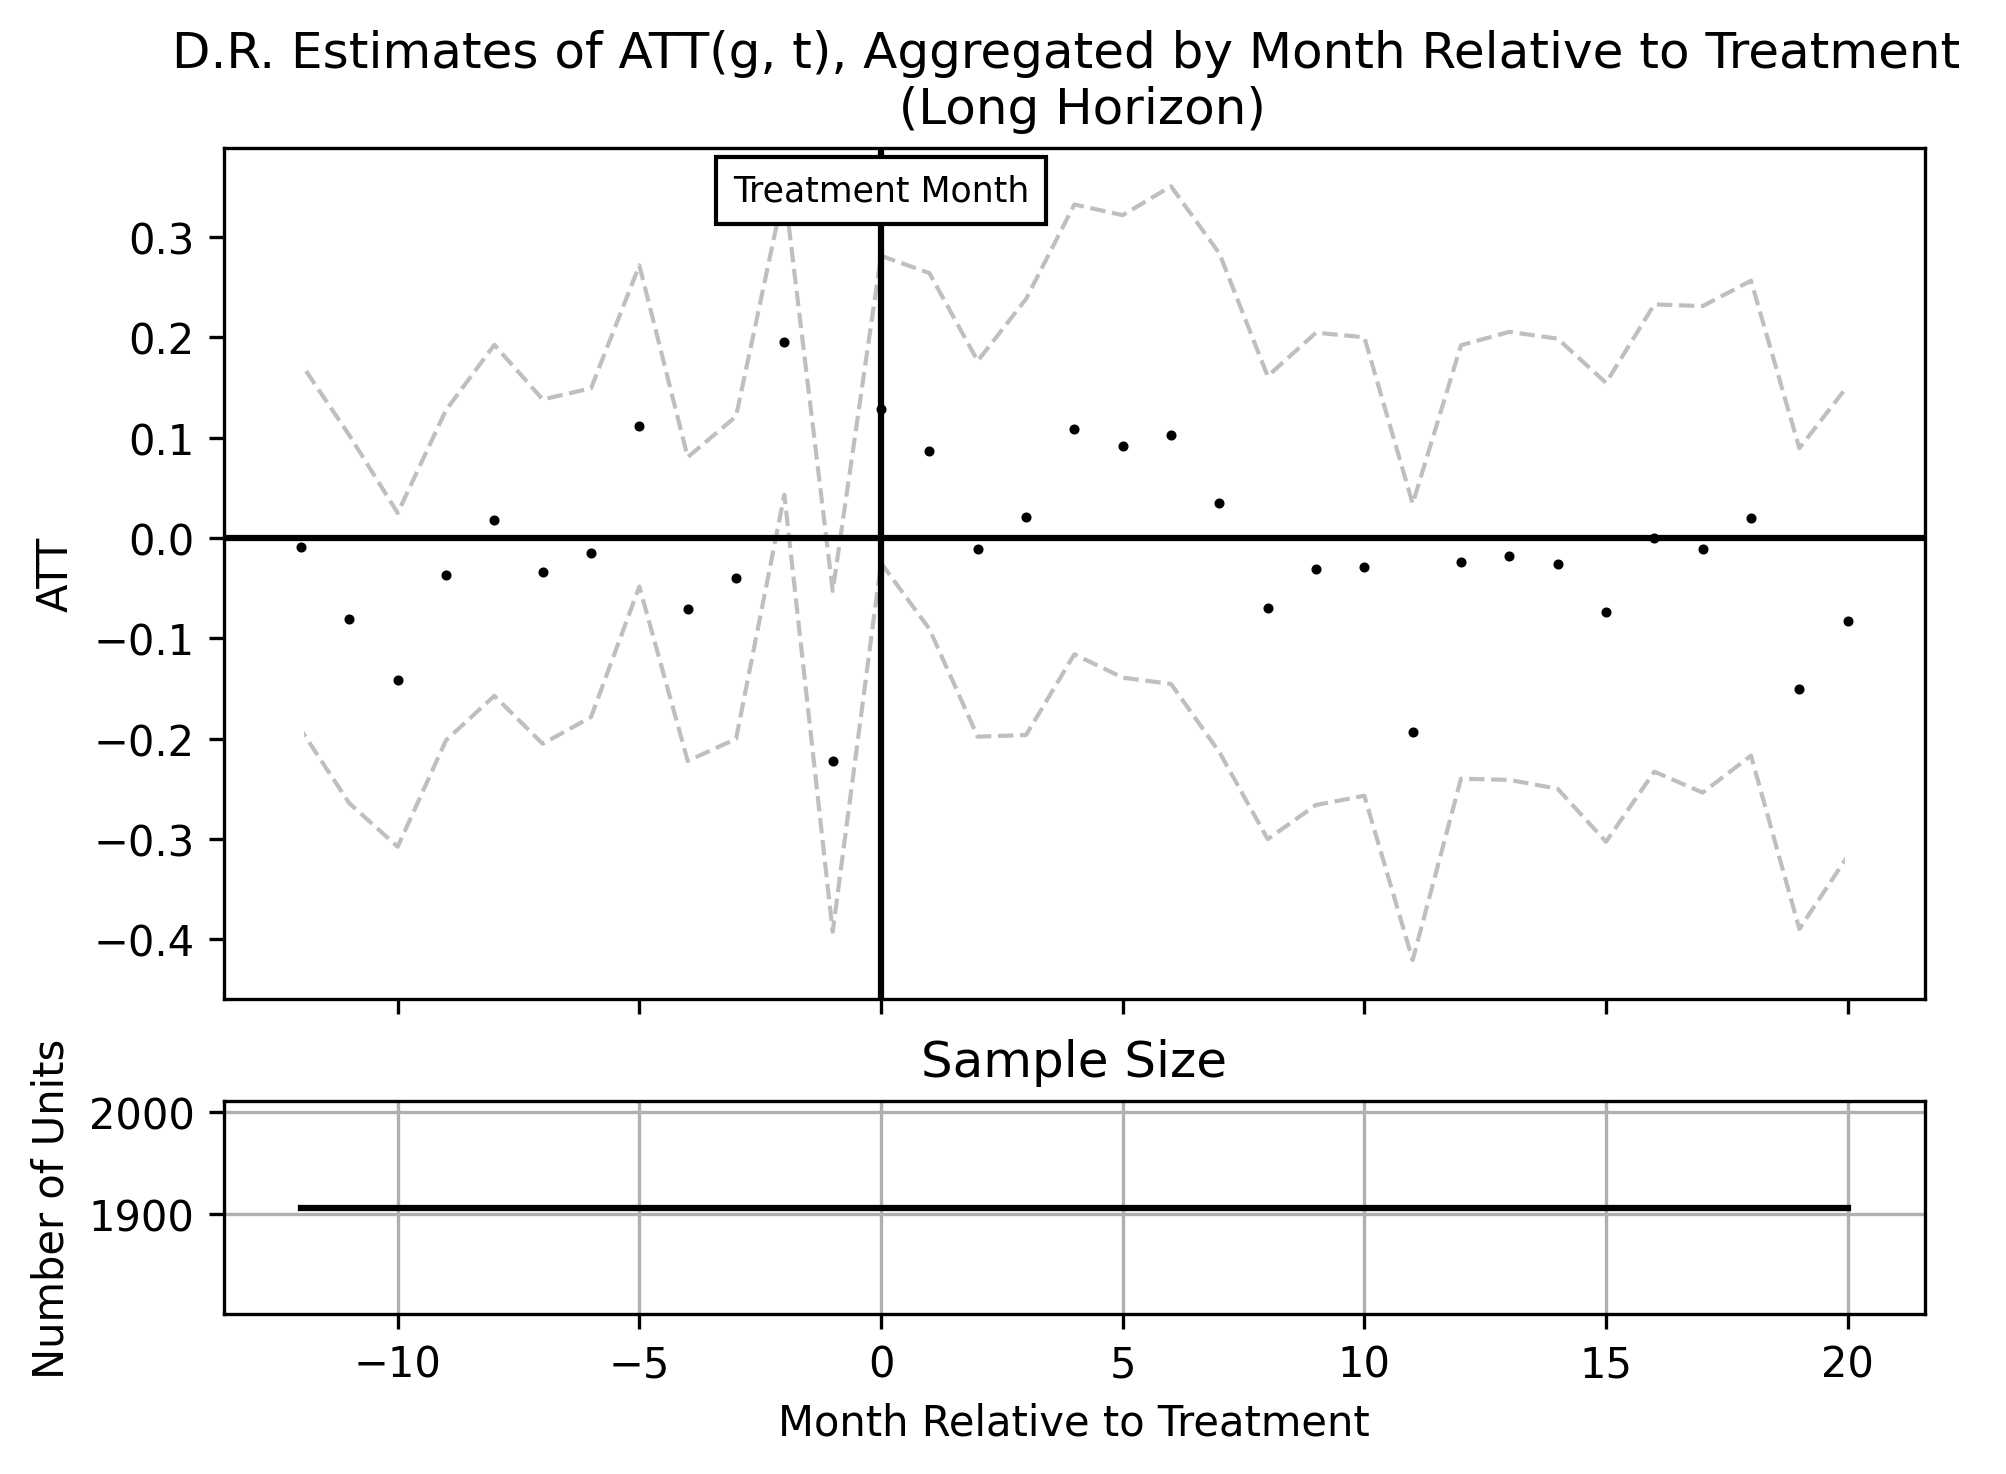

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

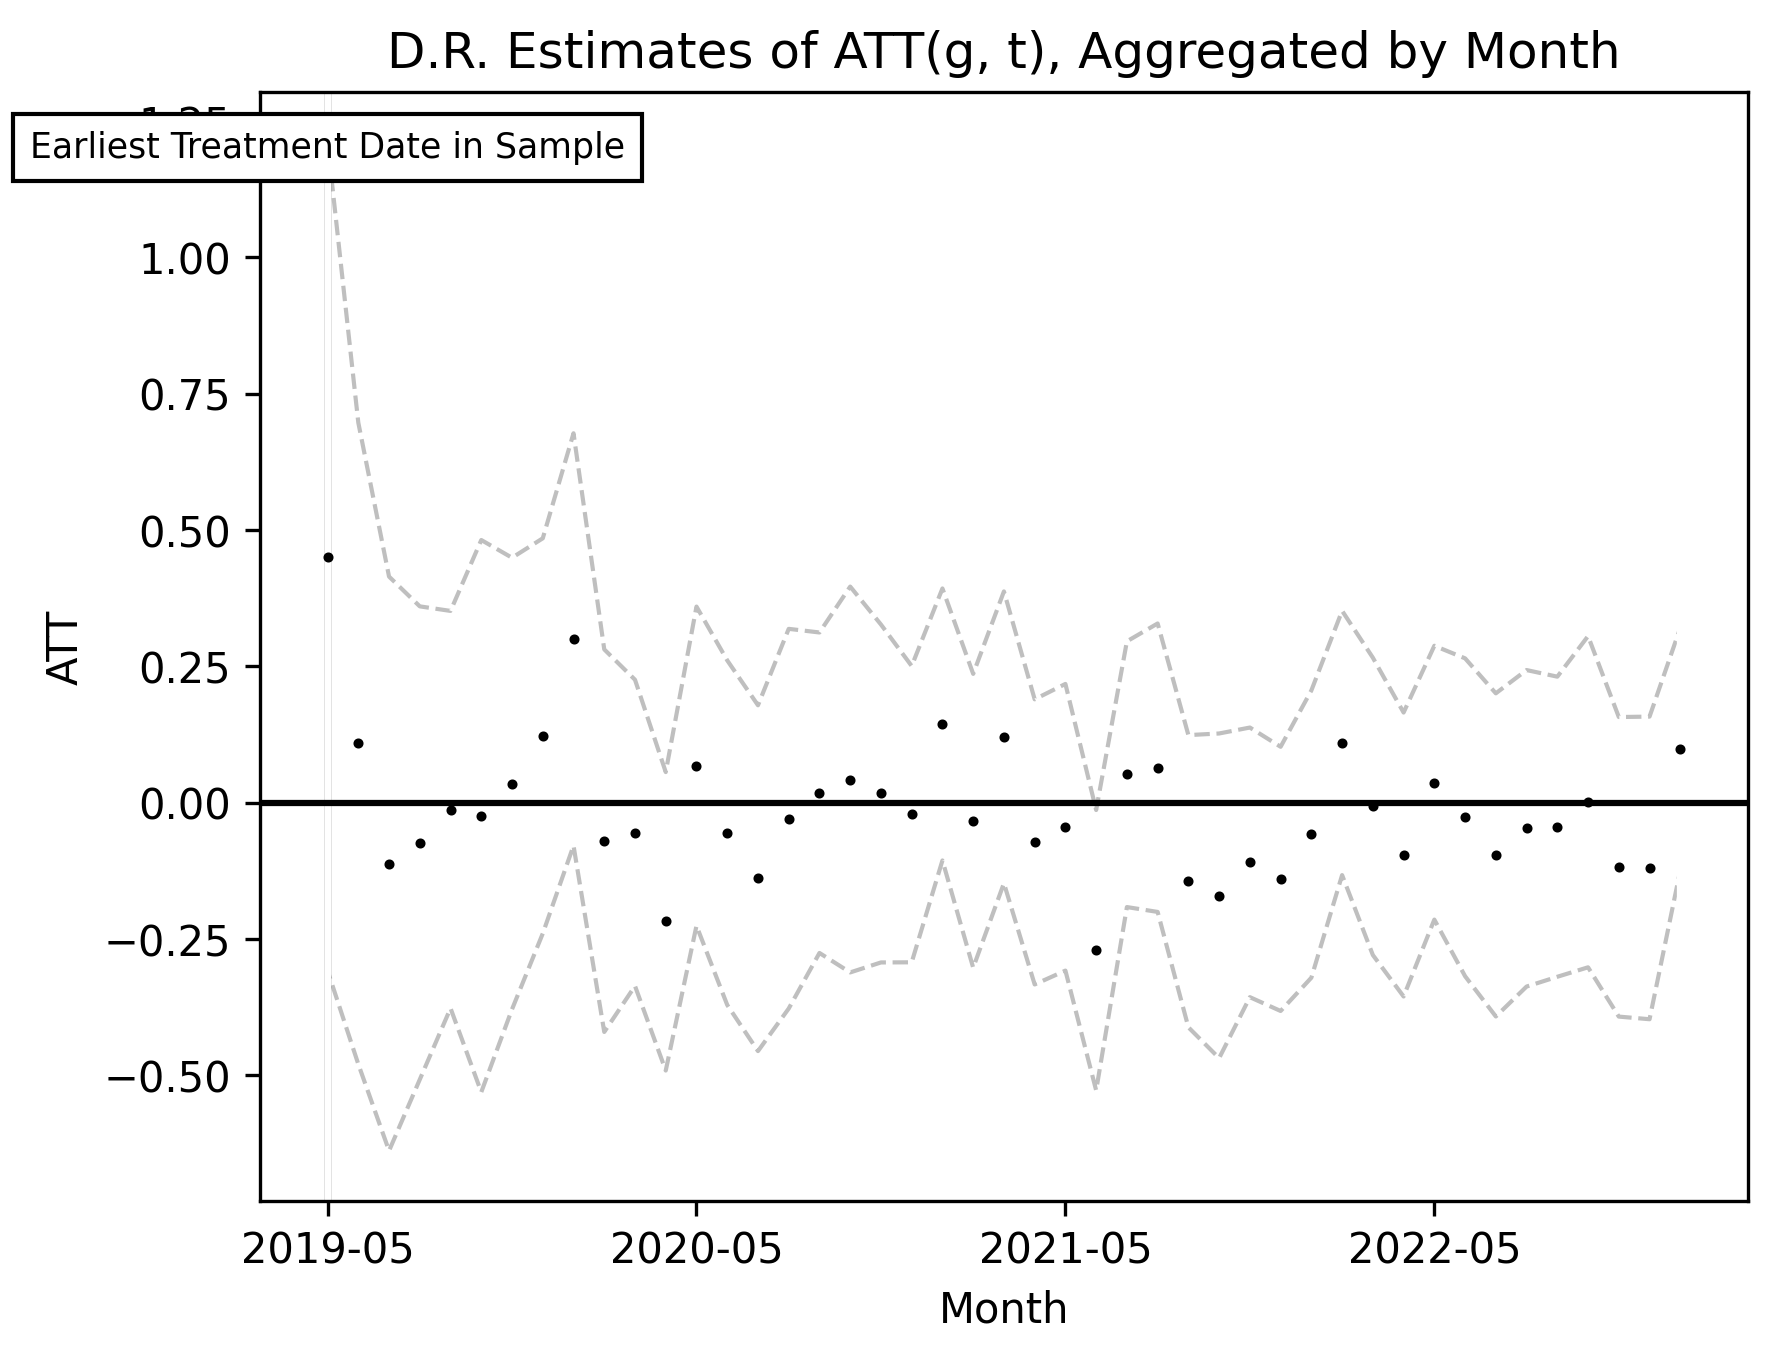

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")